# QR-Code Generator

Notebook containig simple Python script to generate QR-Codes.

**Project-Website:**
https://github.com/kuranez/QR-Code-Generator

## Set Output Directory

In [120]:
import os
import qrcode

In [122]:
# Output directory
output_dir = "./output"
os.makedirs(output_dir, exist_ok=True)

# File path
file_path = os.path.join(output_dir, "example_qr.png")

## Generate QR Code

In [125]:
# Source URL
url = "https://github.com/kuranez/QR-Code-Generator"

# Generate the QR code
qr_img = qrcode.make(url)

# Customize the color
# qr_img = qr.make_image(fill_color="darkgreen", back_color="lightyellow")

# Save the QR code image
qr_img.save(file_path)

file_path

'./output/example_qr.png'

### Debug 

In [128]:
# Check the current working directory
print("Current working directory:", os.getcwd())

# Check if the file has been saved correctly
print("Contents of the output directory:", os.listdir(output_dir))

Current working directory: /home/9599cd84-cd61-406d-816d-638e3f1b716a/Projects/qr-code-generator
Contents of the output directory: ['customized_example.png', 'example_qr.png', '.ipynb_checkpoints', 'example_qr_on_button_click.png']


## Display QR-Code

Image(str, height=500, sizing_mode='fixed', width=500)
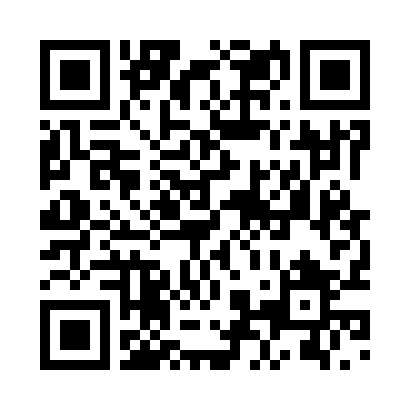

In [131]:
import panel as pn

# Activate Panel extension
pn.extension()

# Display the QR code
qr_display = pn.pane.Image(file_path, width=500, height=500)

qr_display

## App

**Advanced Options**

``version``

This controls the size of the QR code matrix.

The version parameter ranges from 1 to 40.

- version=1 is a 21x21 matrix (smallest QR code).
- version=40 is a 177x177 matrix (largest QR code).

Larger versions can hold more data, but they also result in bigger and more complex QR codes.

``error correction``

This determines the error correction level of the QR code, affecting its resilience to damage or imperfections (e.g., smudges, damage, or distortion).

- ERROR_CORRECT_L: About 7% error recovery. This is the lowest level and allows the most data.
- ERROR_CORRECT_M: About 15% error recovery. This is the default.
- ERROR_CORRECT_Q: About 25% error recovery.
- ERROR_CORRECT_H: About 30% error recovery. This is the highest level and is the most resilient to errors, but it also reduces the amount of data that can be stored.

``box_size``

This controls the size of each "box" or pixel of the QR code in terms of pixels.
A higher box_size results in a larger QR code image.

``border``

This sets the width (in boxes) of the white border around the QR code.
The default value is 4 (the minimum value according to the QR code standard is also 4). Increasing the border can improve scan reliability.

In [135]:
import os
import qrcode
import panel as pn

# Activate Panel extension (necessary in Jupyter notebooks)
pn.extension()

# Output directory and file path
output_dir = "./output"
os.makedirs(output_dir, exist_ok=True)
file_path = os.path.join(output_dir, "example_qr.png")

# Input Widgets
url_input = pn.widgets.TextInput(name='URL', value="https://github.com/kuranez/QR-Code-Generator")
generate_button = pn.widgets.Button(name='Generate QR Code', button_type='primary')

fill_color_picker = pn.widgets.ColorPicker(name='QR Color', value='#000000')  # Black by default
back_color_picker = pn.widgets.ColorPicker(name='Background Color', value='#ffffff')  # White by default

# Advanced Options
version_input = pn.widgets.IntSlider(name='Version (1-40)', start=1, end=40, value=1, step=1)
error_correction_input = pn.widgets.Select(
    name='Error Correction',
    options={
        'Low (7%)': qrcode.constants.ERROR_CORRECT_L,
        'Medium (15%)': qrcode.constants.ERROR_CORRECT_M,
        'Quartile (25%)': qrcode.constants.ERROR_CORRECT_Q,
        'High (30%)': qrcode.constants.ERROR_CORRECT_H
    },
    value=qrcode.constants.ERROR_CORRECT_H  # Default to highest correction
)
box_size_input = pn.widgets.IntSlider(name='Box Size (pixels)', start=1, end=20, value=10, step=1)
border_input = pn.widgets.IntSlider(name='Border (minimum 4)', start=1, end=10, value=4, step=1)

# Placeholder Image
qr_display = pn.pane.Image(width=500, height=500)

# Generate QR Code on click
def generate_qr(event):
    url = url_input.value
    version = version_input.value
    error_correction = error_correction_input.value
    box_size = box_size_input.value
    border = border_input.value
    fill_color = fill_color_picker.value
    back_color = back_color_picker.value
    
    # Create QR code with specified options
    qr = qrcode.QRCode(
        version=version,
        error_correction=error_correction,
        box_size=box_size,
        border=border,
    )
    
    qr.add_data(url)
    qr.make(fit=True)
    img = qr.make_image(fill_color=fill_color, back_color=back_color).convert('RGB')
    img.save(file_path)
    qr_display.object = file_path  # Update the display

# Bind function to button clock
generate_button.on_click(generate_qr)

# Layout widgets
app = pn.Column(
    "## QR Code Generator",
    url_input, 
    pn.Row(fill_color_picker,back_color_picker),
    pn.pane.Markdown("### Advanced Options:"),
    version_input,
    error_correction_input,
    box_size_input,
    border_input,
    generate_button,
    qr_display
)

# Display App
app.servable()

Column
    [0] Markdown(str)
    [1] TextInput(name='URL', value='https://github.com/kurane...)
    [2] Row
        [0] ColorPicker(name='QR Color', value='#000000')
        [1] ColorPicker(name='Background Color', value='#ffffff')
    [3] Markdown(str)
    [4] IntSlider(end=40, name='Version (1-40)', start=1, value=1)
    [5] Select(name='Error Correction', options={'Low (7%)': 1, ...}, value=2)
    [6] IntSlider(end=20, name='Box Size (pixels)', start=1, value=10)
    [7] IntSlider(end=10, name='Border (minimum 4)', start=1, value=4)
    [8] Button(button_type='primary', name='Generate QR Code')
    [9] Image(None, height=500, sizing_mode='fixed', width=500)